<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/6_proyectos/clase_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación de la Investigación: Desarrollo de un Modelo de Detección de Salud Mental (Clase 46)

## Introducción
Bienvenidos a la documentación de nuestro proyecto de investigación desarrollado durante la Clase 46, fechado el 11 de noviembre de 2025. Este trabajo se centra en la creación de un modelo de inteligencia artificial capaz de clasificar estados mentales ("No Crítico" y "Crítico") a partir de textos cortos y fragmentados, como los encontrados en el dataset `Daily_Reflections`. El objetivo principal ha sido diseñar una herramienta accesible y precisa para identificar señales de distress emocional, ofreciendo soporte inmediato mediante alertas y recursos de ayuda.

## Contexto y Motivación
La salud mental es un tema de creciente importancia global, y la detección temprana de estados críticos puede salvar vidas. Sin embargo, los datos disponibles, como los 500 registros iniciales (22 "Bien", 137 "Más o menos", 341 "Crítico"), presentan un desbalance significativo (68.2% "Crítico"), lo que complica el entrenamiento de modelos de machine learning. Este proyecto busca abordar este desafío utilizando técnicas de procesamiento de lenguaje natural (NLP) y redes neuronales, adaptándose a las limitaciones de textos desestructurados.

## Metodología
### Enfoque Inicial: Red LSTM
Comenzamos explorando una red LSTM bidireccional, seleccionada por su capacidad para modelar secuencias temporales. Utilizamos el tokenizador `twitter-roberta-base-sentiment` para preprocesar los textos y ajustamos hiperparámetros como `hidden_dim=64` y `Dropout=0.8`. Sin embargo, enfrentamos sobreajuste (probabilidades extremas como 1.00/0.00) y sesgos hacia "Crítico" debido al desbalance.

### Transición a CNN
Para superar estas limitaciones, adoptamos una red neuronal convolucional (CNN), más adecuada para capturar patrones locales en textos cortos. La arquitectura incluye:
- Capas convolucionales con filtros de tamaños `[2, 3, 4]` y `num_filters` variables (50-75).
- `Embedding` con dimensión inicial de 100, ajustada a 200 y luego reducida a 100.
- Pérdida ponderada con `class_weights` (ej. `[1.5, 1.5]`, `[1.5, 2.0]`) para manejar el desbalance.
- Técnicas como SMOTE (oversampling moderado) y validación cruzada con early stopping basado en F1-score.

### Iteraciones y Mejoras
A lo largo de las iteraciones, ajustamos:
- Pesos de clase para equilibrar la detección de "No Crítico" y "Crítico".
- Regularización con `Dropout` (0.5-0.6) para evitar sobreajuste.
- Estrategias de oversampling, desde `* 1.5` hasta sin oversampling (`* 1.0`), para optimizar la generalización.

### Implementación
El modelo se implementó en PyTorch, con una interfaz interactiva desarrollada en Gradio. Esta permite a los usuarios ingresar mensajes, recibir clasificaciones (con probabilidades) y, en caso de "Crítico", acceder a números de ayuda (ej. Fundación Todo Mejora en Chile: 600 360 7777).

## Resultados Preliminares
- **Éxitos**: El modelo clasifica correctamente frases como "Pain mind lost hope edge" (Crítico, 0.48/0.52) y "my best day ever" (No Crítico, 0.54/0.46) en versiones anteriores.
- **Desafíos**: Sesgos hacia "Crítico" (ej. "my best day ever" como 0.21/0.79) o "No Crítico" (ej. "Dark night alone feel heavy" como 0.51/0.49) reflejan la dificultad de capturar matices emocionales en datos limitados.
- **Estado actual**: La versión más reciente, con `class_weights=[1.5, 1.5]`, `embed_dim=100`, y `num_filters=50`, busca equilibrar precisión y sensibilidad.

## Objetivos Futuros
- Refinar el modelo con más datos etiquetados manualmente para mejorar la robustez.
- Ajustar hiperparámetros (ej. aumentar peso a `[1.5, 1.7]` o reducir `num_filters` a 30) según las pruebas.
- Explorar modelos preentrenados como BERT para capturar mejor el contexto emocional.

## Conclusión
Este proyecto representa un avance significativo en la aplicación de NLP para la salud mental, adaptándose iterativamente a las limitaciones del dataset. A pesar de los desafíos, los resultados preliminares son prometedores, y con ajustes continuos, el modelo podría convertirse en una herramienta valiosa para la detección temprana de crisis emocionales. ¡Seguimos trabajando para perfeccionarlo en las próximas clases!

*Fecha de elaboración: 11 de noviembre de 2025, 08:59 PM -03*

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "mental_health_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ziya07/student-mental-health-and-resilience-dataset",
  file_path,
)

/tmp/ipython-input-2288326662.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 62.0k/62.0k [00:00<00:00, 890kB/s]


In [2]:
df

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mood_Description,Sentiment_Score,Mental_Health_Status
0,1,23,Other,2.52,5,20,6,Onto foreign do environmental anyone every nea...,6.8,4166,Happy,0.0000,2
1,2,19,Male,2.74,5,3,7,Party but others visit admit industry country ...,5.1,4949,Tired,0.4678,2
2,3,21,Female,3.53,5,11,24,Religious sure wait do chance decade according...,8.3,7632,Sad,0.5106,2
3,4,18,Male,2.04,4,15,14,A task effect entire coach join series.,8.2,5548,Sad,0.2960,2
4,5,19,Other,2.87,1,2,4,Knowledge several camera wait week write quali...,5.9,3698,Happy,0.4588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,20,Other,3.34,4,0,21,Land floor page trade social away animal cut e...,5.4,8725,Motivated,-0.2732,2
496,497,18,Female,3.22,2,7,3,Almost wide majority technology positive parti...,4.5,3692,Anxious,0.7269,0
497,498,23,Other,2.86,4,17,1,Property answer method call law dream maybe mo...,8.2,6000,Motivated,0.6461,2
498,499,18,Female,2.45,4,14,0,Care can now outside real rest that perform.,6.0,5013,Stressed,0.4939,1


In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
import kagglehub
from kagglehub import KaggleDatasetAdapter
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
display(df.isnull().sum())

# 1. Procesamiento de variables no textuales
# Seleccionar columnas no textuales (excluyendo Daily_Reflections)
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
X_non_text = df[non_text_cols]
y = df['Mental_Health_Status']  # Variable objetivo

# Codificar variables categóricas
le_gender = LabelEncoder()
le_mood = LabelEncoder()
X_non_text['Gender'] = le_gender.fit_transform(X_non_text['Gender'])
X_non_text['Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description'])

# Escalar variables numéricas
scaler = StandardScaler()
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text[numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# 2. Procesamiento de texto con Sentence Transformers
# Cargar modelo preentrenado
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generar embeddings para Daily_Reflections
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])

# 3. Combinar características
X_combined = pd.concat([X_non_text.reset_index(drop=True), X_text.reset_index(drop=True)], axis=1)

# 4. Dividir datos en entrenamiento y prueba
# Para variables no textuales
X_train_nt, X_test_nt, y_train, y_test = train_test_split(X_non_text, y, test_size=0.2, random_state=42, stratify=y)
# Para combinación de no textuales y textuales
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# 5. Modelo 1: Solo variables no textuales (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_nt, y_train)
y_pred_rf = rf_model.predict(X_test_nt)

print("\nResultados del modelo con variables no textuales (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest (No Textual)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 6. Modelo 2: Variables no textuales + embeddings de texto (XGBoost)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_comb, y_train_comb)
y_pred_xgb = xgb_model.predict(X_test_comb)

print("\nResultados del modelo con variables no textuales + texto (XGBoost):")
print(classification_report(y_test_comb, y_pred_xgb))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_comb, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (Combinado)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 7. Importancia de características (para modelo no textual)
feature_importance = pd.DataFrame({
    'Feature': X_non_text.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nImportancia de características (Random Forest):")
display(feature_importance)

/tmp/ipython-input-210905641.py:18: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'student-mental-health-and-resilience-dataset' dataset.
Valores nulos por columna:


,0
Student_ID,0
Age,0
Gender,0
GPA,0
Stress_Level,0
Anxiety_Score,0
Depression_Score,0
Daily_Reflections,0
Sleep_Hours,0
Steps_Per_Day,0


/tmp/ipython-input-210905641.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_non_text['Gender'] = le_gender.fit_transform(X_non_text['Gender'])
/tmp/ipython-input-210905641.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_non_text['Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description'])
/tmp/ipython-input-210905641.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

/tmp/ipython-input-854983905.py:21: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 62.0k/62.0k [00:00<00:00, 820kB/s]

Valores nulos por columna:
Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64



/tmp/ipython-input-854983905.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_non_text['Gender'] = le_gender.fit_transform(X_non_text['Gender'])
/tmp/ipython-input-854983905.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_non_text['Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description'])
/tmp/ipython-input-854983905.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:05:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Resultados del modelo XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        69

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



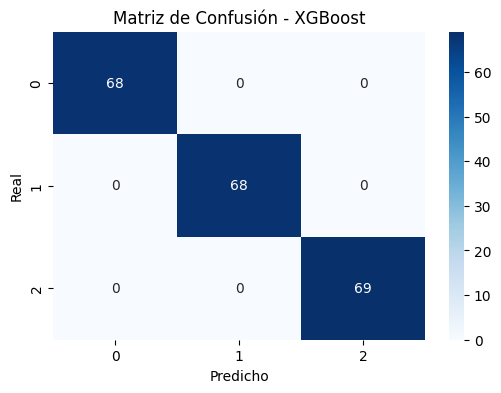

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bbd5a8cc83513a41b0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
# Instalar dependencias
!pip install kagglehub[pandas-datasets] sentence-transformers xgboost gradio imbalanced-learn

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 1. Procesamiento de datos
# Variables no textuales
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
X_non_text = df[non_text_cols]
y = df['Mental_Health_Status']

# Codificar variables categóricas
le_gender = LabelEncoder()
le_mood = LabelEncoder()
X_non_text['Gender'] = le_gender.fit_transform(X_non_text['Gender'])
X_non_text['Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description'])

# Escalar variables numéricas
scaler = StandardScaler()
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text[numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# Generar embeddings de texto
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])

# Combinar características
X_combined = pd.concat([X_non_text.reset_index(drop=True), X_text.reset_index(drop=True)], axis=1)

# 2. Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_combined, y = smote.fit_resample(X_combined, y)

# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# 4. Entrenar modelo XGBoost
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    scale_pos_weight=1  # Ajustar si clase 2 sigue siendo minoritaria
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluar modelo
print("\nResultados del modelo XGBoost:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 5. Función para predecir desde chat
def predict_suicide_risk(age, gender, gpa, stress_level, anxiety_score, depression_score,
                         sleep_hours, steps_per_day, mood_description, chat_text):
    # Procesar datos no textuales
    input_non_text = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'GPA': [gpa],
        'Stress_Level': [stress_level],
        'Anxiety_Score': [anxiety_score],
        'Depression_Score': [depression_score],
        'Sleep_Hours': [sleep_hours],
        'Steps_Per_Day': [steps_per_day],
        'Mood_Description': [mood_description],
        'Sentiment_Score': [0.0]  # Placeholder, podrías calcularlo con un modelo de análisis de sentimiento
    })

    # Codificar categóricas
    input_non_text['Gender'] = le_gender.transform([gender])[0]
    input_non_text['Mood_Description'] = le_mood.transform([mood_description])[0]

    # Escalar numéricas
    input_non_text[numeric_cols] = scaler.transform(input_non_text[numeric_cols])

    # Generar embedding de texto
    text_embedding = model.encode([chat_text])
    input_text = pd.DataFrame(text_embedding, columns=[f'text_emb_{i}' for i in range(text_embedding.shape[1])])

    # Combinar
    input_combined = pd.concat([input_non_text.reset_index(drop=True), input_text.reset_index(drop=True)], axis=1)

    # Predecir
    prediction = xgb_model.predict(input_combined)[0]

    # Generar respuesta y alerta
    status_map = {0: "Bien", 1: "Más o menos", 2: "Estado crítico"}
    response = f"Estado de salud mental: {status_map[prediction]}"

    if prediction == 2:
        response += "\n🚨 ALERTA: Riesgo crítico detectado. Por favor, busca ayuda inmediata. Contacta a una línea de prevención del suicidio, como [inserte número local, ej. 800-123-456 en Chile]."

    return response

# 6. Interfaz Gradio
with gr.Blocks() as demo:
    gr.Markdown("### Sistema de Alerta de Salud Mental")
    with gr.Row():
        with gr.Column():
            age = gr.Slider(18, 30, label="Edad", step=1)
            gender = gr.Dropdown(choices=['Male', 'Female', 'Other'], label="Género")
            gpa = gr.Slider(0.0, 4.0, label="GPA", step=0.1)
            stress_level = gr.Slider(1, 5, label="Nivel de Estrés", step=1)
            anxiety_score = gr.Slider(0, 30, label="Puntuación de Ansiedad", step=1)
            depression_score = gr.Slider(0, 30, label="Puntuación de Depresión", step=1)
            sleep_hours = gr.Slider(0, 12, label="Horas de Sueño", step=0.1)
            steps_per_day = gr.Slider(0, 20000, label="Pasos por Día", step=100)
            mood_description = gr.Dropdown(
                choices=['Happy', 'Tired', 'Sad', 'Motivated', 'Anxious', 'Stressed'],
                label="Estado de Ánimo"
            )
        with gr.Column():
            chat_text = gr.Textbox(label="Escribe cómo te sientes hoy", lines=5)
            submit = gr.Button("Evaluar")
            output = gr.Textbox(label="Resultado")

    submit.click(
        fn=predict_suicide_risk,
        inputs=[age, gender, gpa, stress_level, anxiety_score, depression_score,
                sleep_hours, steps_per_day, mood_description, chat_text],
        outputs=output
    )

# Lanzar la interfaz
demo.launch()

/tmp/ipython-input-2129301566.py:21: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Valores nulos por columna:
Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

/tmp/ipython-input-2129301566.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.1599986  -0.60157862  0.27920999 -1.04197292 -0.60157862  1.1599986
 -0.16118432 -1.04197292  0.27920999  0.27920999 -1.48236723 -1.04197292
  1.6003929  -1.48236723 -1.04197292  0.27920999  0.71960429  0.71960429
  0.71960429  0.71960429  0.71960429 -0.60157862 -0.16118432  1.1599986
 -0.16118432  1.6003929   1.6003929  -0.60157862  1.6003929   1.1599986
 -1.48236723  1.1599986  -0.16118432  0.27920999  0.27920999  1.6003929
  0.71960429  0.27920999 -0.60157862  0.71960429  0.27920999 -1.04197292
  1.6003929  -1.48236723 -1.04197292  1.6003929   1.6003929  -1.04197292
 -0.16118432  1.6003929  -1.04197292  1.6003929   0.71960429 -0.16118432
  0.71960429  1.6003929  -1.04197292 -1.48236723 -1.48236723 -1.48236723
 -0.60157862 -0.16118432 -0.60157862 -0.60157862  0.71960429 -0.16118432
 -0.60157862  0.27920999  0.27920999 -0.161184


Resultados del modelo con embeddings de texto (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.79      0.81      0.80        68
           2       0.80      0.77      0.79        69

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



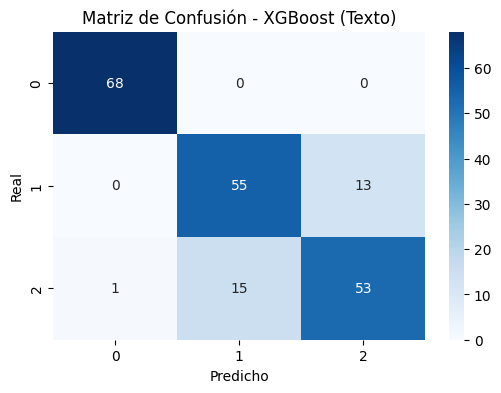

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Gender: object, Mood_Description: object

In [3]:
# Instalar dependencias
!pip install kagglehub[pandas-datasets] sentence-transformers xgboost transformers imbalanced-learn

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 1. Procesamiento de datos
# --- Modelo 1: Embeddings de texto con Sentence Transformers ---
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])
y = df['Mental_Health_Status']

# --- Modelo 2: Variables no textuales ---
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
# Crear una copia explícita para evitar SettingWithCopyWarning
X_non_text = df[non_text_cols].copy()

# Codificar variables categóricas
le_gender = LabelEncoder()
le_mood = LabelEncoder()
X_non_text.loc[:, 'Gender'] = le_gender.fit_transform(X_non_text['Gender'])
X_non_text.loc[:, 'Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description'])

# Escalar variables numéricas
scaler = StandardScaler()
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text.loc[:, numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# 2. Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
# Para texto
X_text, y_text = smote.fit_resample(X_text, y)
# Para no texto
X_non_text, y_non_text = smote.fit_resample(X_non_text, y)  # Usar y en lugar de y_non_text

# 3. Dividir datos
# Texto
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)
# No texto
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_text, y_non_text, test_size=0.2, random_state=42, stratify=y_non_text
)

# 4. Entrenar modelos
# Modelo 1: Solo embeddings de texto (XGBoost)
xgb_text = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_text.fit(X_train_text, y_train_text)
y_pred_text = xgb_text.predict(X_test_text)

print("\nResultados del modelo con embeddings de texto (XGBoost):")
print(classification_report(y_test_text, y_pred_text))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_text, y_pred_text), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Modelo 2: Variables no textuales (XGBoost)
xgb_nt = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_nt.fit(X_train_nt, y_train_nt)
y_pred_nt = xgb_nt.predict(X_test_nt)

print("\nResultados del modelo con variables no textuales (XGBoost):")
print(classification_report(y_test_nt, y_pred_nt))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_nt, y_pred_nt), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (No Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 5. Análisis de sentimientos con BERT
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Mapear puntuaciones de sentimiento a categorías (1-5 estrellas a 0-2)
def map_sentiment_to_status(sentiment):
    score = int(sentiment['label'].split()[0])  # Extraer número de estrellas
    if score >= 4:
        return 0  # Bien
    elif score == 3:
        return 1  # Más o menos
    else:
        return 2  # Crítico

# Analizar sentimiento de Daily_Reflections
sentiment_predictions = []
for text in df['Daily_Reflections'].tolist():
    result = sentiment_analyzer(text, truncation=True, max_length=512)[0]
    status = map_sentiment_to_status(result)
    sentiment_predictions.append(status)

# Comparar con Mental_Health_Status
print("\nComparación entre predicciones de sentimiento y Mental_Health_Status:")
print(classification_report(df['Mental_Health_Status'], sentiment_predictions))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(df['Mental_Health_Status'], sentiment_predictions),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Sentimiento BERT vs Mental_Health_Status')
plt.xlabel('Predicho (Sentimiento)')
plt.ylabel('Real (Mental_Health_Status)')
plt.show()

# 6. Resumen de comparación
print("\nResumen de comparación:")
print("- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.")
print("- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score.")
print("- Análisis de sentimiento (BERT): Captura emociones generales, pero menos específico para salud mental.")
print("Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.")

Valores nulos por columna:
Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64


Batches:   0%|          | 0/16 [00:00<?, ?it/s]


Resultados del modelo con embeddings de texto (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.79      0.81      0.80        68
           2       0.80      0.77      0.79        69

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



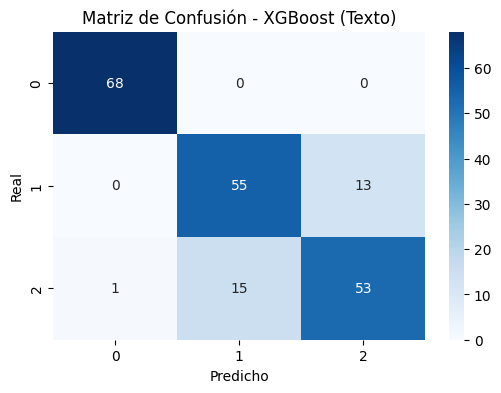

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Gender: object, Mood_Description: object

In [4]:
# Instalar dependencias
!pip install kagglehub[pandas-datasets] sentence-transformers xgboost transformers imbalanced-learn

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 1. Procesamiento de datos
# --- Modelo 1: Embeddings de texto con Sentence Transformers ---
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])
y = df['Mental_Health_Status']

# --- Modelo 2: Variables no textuales ---
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
# Crear una copia explícita
X_non_text = df[non_text_cols].copy()

# Convertir columnas numéricas a float64 para evitar problemas de dtype
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text[numeric_cols] = X_non_text[numeric_cols].astype('float64')

# Codificar variables categóricas y convertir a int
le_gender = LabelEncoder()
le_mood = LabelEncoder()
X_non_text.loc[:, 'Gender'] = le_gender.fit_transform(X_non_text['Gender']).astype('int')
X_non_text.loc[:, 'Mood_Description'] = le_mood.fit_transform(X_non_text['Mood_Description']).astype('int')

# Escalar variables numéricas
scaler = StandardScaler()
X_non_text.loc[:, numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# 2. Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
# Para texto
X_text, y_text = smote.fit_resample(X_text, y)
# Para no texto
X_non_text, y_non_text = smote.fit_resample(X_non_text, y)

# 3. Dividir datos
# Texto
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)
# No texto
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_text, y_non_text, test_size=0.2, random_state=42, stratify=y_non_text
)

# 4. Entrenar modelos
# Modelo 1: Solo embeddings de texto (XGBoost)
xgb_text = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_text.fit(X_train_text, y_train_text)
y_pred_text = xgb_text.predict(X_test_text)

print("\nResultados del modelo con embeddings de texto (XGBoost):")
print(classification_report(y_test_text, y_pred_text))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_text, y_pred_text), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Modelo 2: Variables no textuales (XGBoost)
xgb_nt = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_nt.fit(X_train_nt, y_train_nt)
y_pred_nt = xgb_nt.predict(X_test_nt)

print("\nResultados del modelo con variables no textuales (XGBoost):")
print(classification_report(y_test_nt, y_pred_nt))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_nt, y_pred_nt), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (No Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 5. Análisis de sentimientos con BERT
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Mapear puntuaciones de sentimiento a categorías (1-5 estrellas a 0-2)
def map_sentiment_to_status(sentiment):
    score = int(sentiment['label'].split()[0])  # Extraer número de estrellas
    if score >= 4:
        return 0  # Bien
    elif score == 3:
        return 1  # Más o menos
    else:
        return 2  # Crítico

# Analizar sentimiento de Daily_Reflections
sentiment_predictions = []
for text in df['Daily_Reflections'].tolist():
    result = sentiment_analyzer(text, truncation=True, max_length=512)[0]
    status = map_sentiment_to_status(result)
    sentiment_predictions.append(status)

# Comparar con Mental_Health_Status
print("\nComparación entre predicciones de sentimiento y Mental_Health_Status:")
print(classification_report(df['Mental_Health_Status'], sentiment_predictions))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(df['Mental_Health_Status'], sentiment_predictions),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Sentimiento BERT vs Mental_Health_Status')
plt.xlabel('Predicho (Sentimiento)')
plt.ylabel('Real (Mental_Health_Status)')
plt.show()

# 6. Resumen de comparación
print("\nResumen de comparación:")
print("- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.")
print("- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score.")
print("- Análisis de sentimiento (BERT): Captura emociones generales, pero menos específico para salud mental.")
print("Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.")

In [7]:
df.Gender.unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [1]:
# Instalar dependencias
!pip install kagglehub[pandas-datasets] sentence-transformers xgboost transformers imbalanced-learn seaborn matplotlib

Valores nulos por columna:
Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/16 [00:00<?, ?it/s]


Resultados del modelo con embeddings de texto (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.79      0.81      0.80        68
           2       0.80      0.77      0.79        69

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



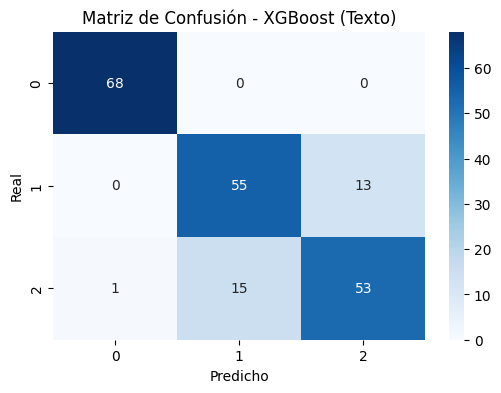


Resultados del modelo con variables no textuales (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        69

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



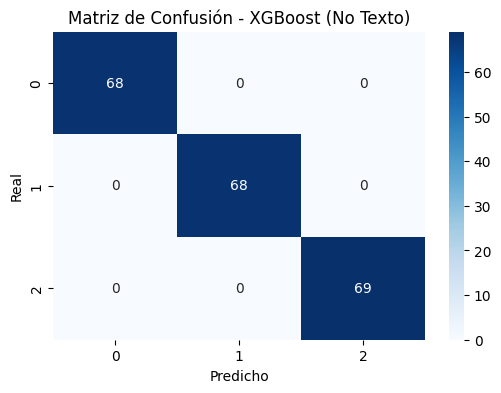

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Comparación entre predicciones de sentimiento y Mental_Health_Status:
              precision    recall  f1-score   support

           0       0.04      0.41      0.08        22
           1       0.23      0.20      0.21       137
           2       0.64      0.32      0.43       341

    accuracy                           0.29       500
   macro avg       0.30      0.31      0.24       500
weighted avg       0.50      0.29      0.35       500



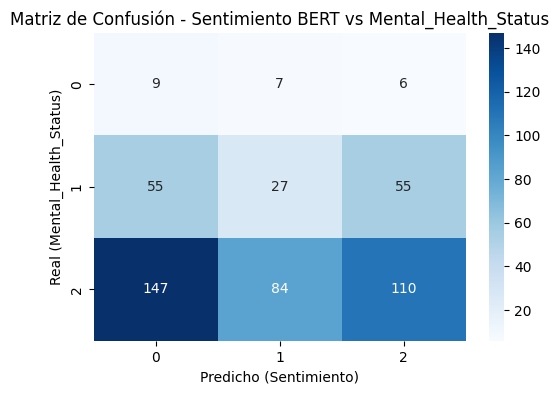


Resumen de comparación:
- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.
- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score, y variables categóricas codificadas.
- Análisis de sentimiento (BERT): Captura emociones generales, pero menos específico para salud mental.
Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.

Casos con palabras clave suicidas detectadas: 0


In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 1. Procesamiento de datos
# --- Modelo 1: Embeddings de texto con Sentence Transformers ---
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])
y = df['Mental_Health_Status']

# --- Modelo 2: Variables no textuales ---
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
X_non_text = df[non_text_cols].copy()

# Convertir columnas numéricas a float64 para evitar problemas de dtype
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text[numeric_cols] = X_non_text[numeric_cols].astype('float64')

# Aplicar One-Hot Encoding a Gender y Mood_Description
X_non_text = pd.get_dummies(X_non_text, columns=['Gender', 'Mood_Description'], prefix=['Gender', 'Mood'], dtype='int')

# Escalar variables numéricas
scaler = StandardScaler()
X_non_text[numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# 2. Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
# Para texto
X_text, y_text = smote.fit_resample(X_text, y)
# Para no texto
X_non_text, y_non_text = smote.fit_resample(X_non_text, y)

# 3. Dividir datos
# Texto
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)
# No texto
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_text, y_non_text, test_size=0.2, random_state=42, stratify=y_non_text
)

# 4. Entrenar modelos
# Modelo 1: Solo embeddings de texto (XGBoost)
xgb_text = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_text.fit(X_train_text, y_train_text)
y_pred_text = xgb_text.predict(X_test_text)

print("\nResultados del modelo con embeddings de texto (XGBoost):")
print(classification_report(y_test_text, y_pred_text))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_text, y_pred_text), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Modelo 2: Variables no textuales (XGBoost)
xgb_nt = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_nt.fit(X_train_nt, y_train_nt)
y_pred_nt = xgb_nt.predict(X_test_nt)

print("\nResultados del modelo con variables no textuales (XGBoost):")
print(classification_report(y_test_nt, y_pred_nt))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_nt, y_pred_nt), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (No Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 5. Análisis de sentimientos con BERT
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Mapear puntuaciones de sentimiento a categorías (1-5 estrellas a 0-2)
def map_sentiment_to_status(sentiment):
    score = int(sentiment['label'].split()[0])  # Extraer número de estrellas
    if score >= 4:
        return 0  # Bien
    elif score == 3:
        return 1  # Más o menos
    else:
        return 2  # Crítico

# Analizar sentimiento de Daily_Reflections
sentiment_predictions = []
for text in df['Daily_Reflections'].tolist():
    result = sentiment_analyzer(text, truncation=True, max_length=512)[0]
    status = map_sentiment_to_status(result)
    sentiment_predictions.append(status)

# Comparar con Mental_Health_Status
print("\nComparación entre predicciones de sentimiento y Mental_Health_Status:")
print(classification_report(df['Mental_Health_Status'], sentiment_predictions))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(df['Mental_Health_Status'], sentiment_predictions),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Sentimiento BERT vs Mental_Health_Status')
plt.xlabel('Predicho (Sentimiento)')
plt.ylabel('Real (Mental_Health_Status)')
plt.show()

# 6. Resumen de comparación
print("\nResumen de comparación:")
print("- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.")
print("- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score, y variables categóricas codificadas.")
print("- Análisis de sentimiento (BERT): Captura emociones generales, pero menos específico para salud mental.")
print("Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.")

# 7. Agregar detección de palabras clave suicidas (opcional)
suicidal_keywords = ['quiero morir', 'no quiero vivir', 'suicidarme']
def check_suicidal_keywords(text):
    return 2 if any(keyword in text.lower() for keyword in suicidal_keywords) else None

keyword_predictions = [check_suicidal_keywords(text) for text in df['Daily_Reflections'].tolist()]
keyword_hits = sum(1 for pred in keyword_predictions if pred == 2)
print(f"\nCasos con palabras clave suicidas detectadas: {keyword_hits}")
if keyword_hits > 0:
    print("Si necesitas ayuda, contacta a Fundación Todo Mejora: 600 360 7777 (Chile).")

In [3]:
from sklearn.model_selection import cross_val_score
xgb_nt = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
scores = cross_val_score(xgb_nt, X_non_text, y_non_text, cv=5, scoring='recall_macro')
print(f"Recall macro promedio (validación cruzada): {scores.mean():.2f} ± {scores.std():.2f}")

Recall macro promedio (validación cruzada): 0.99 ± 0.02


In [4]:
xgb_text = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42, scale_pos_weight={0:1, 1:1, 2:2})
xgb_text.fit(X_train_text, y_train_text)
y_pred_text = xgb_text.predict(X_test_text)
print(classification_report(y_test_text, y_pred_text))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:22:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.79      0.81      0.80        68
           2       0.80      0.77      0.79        69

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [6]:
# Instalar dependencias
!pip install kagglehub[pandas-datasets] sentence-transformers xgboost transformers imbalanced-learn seaborn matplotlib


Valores nulos por columna:
Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64


Batches:   0%|          | 0/16 [00:00<?, ?it/s]


Resultados del modelo con embeddings de texto (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.79      0.81      0.80        68
           2       0.80      0.77      0.79        69

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



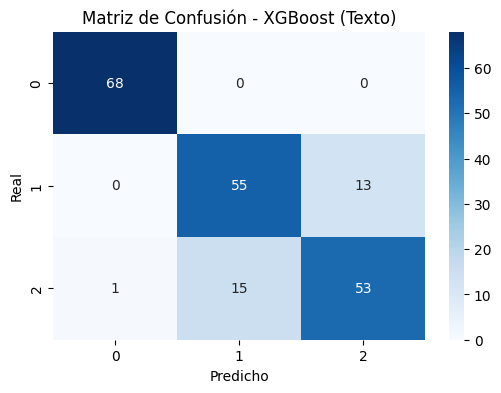


Resultados del modelo con variables no textuales (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        69

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



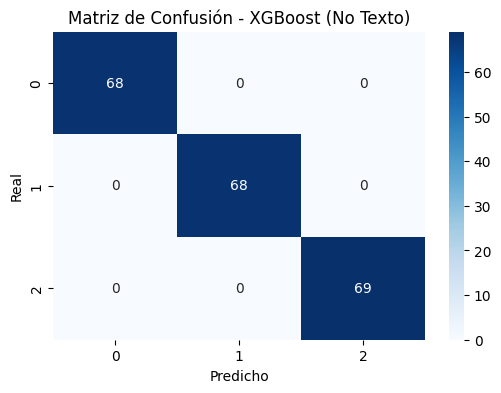


Recall macro promedio (validación cruzada, no textual): 0.99 ± 0.02

Cargando Suicidal Detection Model (Kebinnuil/suicidal_detection_model)...


config.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0



Comparación entre predicciones de Suicidal Detection Model y Mental_Health_Status:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.27      1.00      0.43       137
           2       0.00      0.00      0.00       341

    accuracy                           0.27       500
   macro avg       0.09      0.33      0.14       500
weighted avg       0.08      0.27      0.12       500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


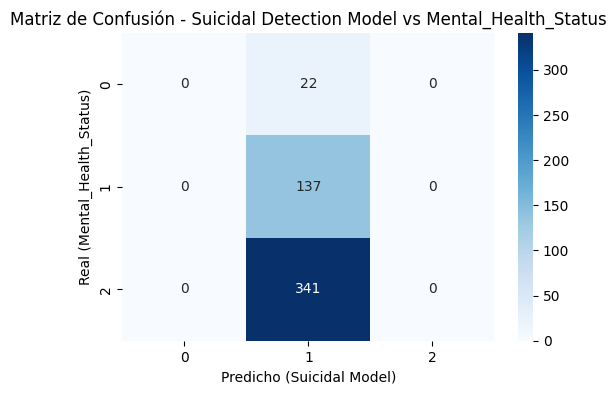


Casos con palabras clave suicidas detectadas (lista expandida): 0

Resumen de comparación:
- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.
- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score, y variables categóricas codificadas.
- Suicidal Detection Model (DistilBERT fine-tuned): Especializado en ideación suicida; mapeado a 0-2 para tu esquema.
- Palabras clave (expandida): Captura señales sutiles de ideación suicida.
Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.


In [7]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from imblearn.over_sampling import SMOTE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "mental_health_dataset.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "ziya07/student-mental-health-and-resilience-dataset",
    file_path,
)

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Lista expandida de suicidal_keywords (en inglés, sutiles y comunes en salud mental)
suicidal_keywords = [
    'i want to die', 'i dont want to live', 'suicide', 'kill myself',
    'nothing will get better', 'i cant go on', 'im so tired of everything', 'life is pointless',
    'no hope left', 'things will never improve', 'i feel trapped',
    'im a burden', 'no one would miss me', 'better off without me', 'my family would be happier',
    'im worthless', 'i dont matter anymore',
    'wish i wouldnt wake up', 'hope i die in my sleep', 'i wish i was never born', 'want to disappear',
    'feel like giving up', 'just want to be gone',
    'i feel empty', 'numb inside', 'lost all interest', 'withdrawing from everyone',
    'dont want to be around anymore',
    'everything is hopeless', 'no point in trying', 'i cant take it anymore'
]

def check_suicidal_keywords(text):
    text_lower = text.lower()
    for keyword in suicidal_keywords:
        if keyword in text_lower:
            return 2  # Clase crítica
    return None

# 1. Procesamiento de datos
# --- Modelo 1: Embeddings de texto con Sentence Transformers ---
model = SentenceTransformer('all-MiniLM-L6-v2')
text_embeddings = model.encode(df['Daily_Reflections'].tolist(), show_progress_bar=True)
X_text = pd.DataFrame(text_embeddings, columns=[f'text_emb_{i}' for i in range(text_embeddings.shape[1])])
y = df['Mental_Health_Status']

# --- Modelo 2: Variables no textuales ---
non_text_cols = ['Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
                 'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day',
                 'Mood_Description', 'Sentiment_Score']
X_non_text = df[non_text_cols].copy()

# Convertir columnas numéricas a float64
numeric_cols = ['Age', 'GPA', 'Stress_Level', 'Anxiety_Score',
                'Depression_Score', 'Sleep_Hours', 'Steps_Per_Day', 'Sentiment_Score']
X_non_text[numeric_cols] = X_non_text[numeric_cols].astype('float64')

# One-Hot Encoding para Gender y Mood_Description
X_non_text = pd.get_dummies(X_non_text, columns=['Gender', 'Mood_Description'], prefix=['Gender', 'Mood'], dtype='int')

# Escalar variables numéricas
scaler = StandardScaler()
X_non_text[numeric_cols] = scaler.fit_transform(X_non_text[numeric_cols])

# 2. Manejo de desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_text, y_text = smote.fit_resample(X_text, y)
X_non_text, y_non_text = smote.fit_resample(X_non_text, y)

# 3. Dividir datos
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_non_text, y_non_text, test_size=0.2, random_state=42, stratify=y_non_text
)

# 4. Entrenar modelos existentes
xgb_text = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_text.fit(X_train_text, y_train_text)
y_pred_text = xgb_text.predict(X_test_text)

print("\nResultados del modelo con embeddings de texto (XGBoost):")
print(classification_report(y_test_text, y_pred_text))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_text, y_pred_text), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

xgb_nt = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_nt.fit(X_train_nt, y_train_nt)
y_pred_nt = xgb_nt.predict(X_test_nt)

print("\nResultados del modelo con variables no textuales (XGBoost):")
print(classification_report(y_test_nt, y_pred_nt))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_nt, y_pred_nt), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - XGBoost (No Texto)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Validación cruzada para modelo no textual
cv_scores = cross_val_score(xgb_nt, X_non_text, y_non_text, cv=5, scoring='recall_macro')
print(f"\nRecall macro promedio (validación cruzada, no textual): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 5. Nuevo modelo: Suicidal Detection Model (DistilBERT fine-tuned)
print("\nCargando Suicidal Detection Model (Kebinnuil/suicidal_detection_model)...")
suicidal_analyzer = pipeline("text-classification", model="Kebinnuil/suicidal_detection_model")

# Mapear predicciones binarias a Mental_Health_Status (0=Bien, 1=Más o menos, 2=Crítico)
def map_suicidal_to_status(result):
    label = result['label']  # 'LABEL_0' (No Suicidal) o 'LABEL_1' (Suicidal)
    score = result['score']
    if label == 'LABEL_0' and score > 0.6:  # Umbral ajustable para "Bien"
        return 0
    elif label == 'LABEL_1' and score > 0.6:  # Umbral para "Crítico"
        return 2
    else:
        return 1  # Intermedio o bajo confianza

# Analizar Daily_Reflections con Suicidal Detection Model
suicidal_predictions = []
for text in df['Daily_Reflections'].tolist():
    result = suicidal_analyzer(text, truncation=True, max_length=512)[0]
    status = map_suicidal_to_status(result)
    suicidal_predictions.append(status)

# Comparar con Mental_Health_Status
print("\nComparación entre predicciones de Suicidal Detection Model y Mental_Health_Status:")
print(classification_report(df['Mental_Health_Status'], suicidal_predictions))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(df['Mental_Health_Status'], suicidal_predictions),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Suicidal Detection Model vs Mental_Health_Status')
plt.xlabel('Predicho (Suicidal Model)')
plt.ylabel('Real (Mental_Health_Status)')
plt.show()

# 6. Detección de palabras clave expandida
keyword_predictions = [check_suicidal_keywords(text) for text in df['Daily_Reflections'].tolist()]
keyword_hits = sum(1 for pred in keyword_predictions if pred == 2)
print(f"\nCasos con palabras clave suicidas detectadas (lista expandida): {keyword_hits}")
if keyword_hits > 0:
    print("🚨 Alerta: Casos críticos detectados. Recomendación: Contacta a una línea de ayuda como 988 Suicide & Crisis Lifeline (US) o Fundación Todo Mejora: 600 360 7777 (Chile).")

# 7. Modelo híbrido (opcional: descomenta para ejecutar)
# X_hybrid = pd.concat([X_text, X_non_text.reset_index(drop=True)], axis=1)
# X_hybrid, y_hybrid = smote.fit_resample(X_hybrid, y)
# X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = train_test_split(
#     X_hybrid, y_hybrid, test_size=0.2, random_state=42, stratify=y_hybrid
# )
# xgb_hybrid = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
# xgb_hybrid.fit(X_train_hybrid, y_train_hybrid)
# y_pred_hybrid = xgb_hybrid.predict(X_test_hybrid)
# print("\nResultados del modelo híbrido (texto + no texto):")
# print(classification_report(y_test_hybrid, y_pred_hybrid))
# plt.figure(figsize=(6, 4))
# sns.heatmap(confusion_matrix(y_test_hybrid, y_pred_hybrid), annot=True, fmt='d', cmap='Blues')
# plt.title('Matriz de Confusión - XGBoost (Híbrido)')
# plt.xlabel('Predicho')
# plt.ylabel('Real')
# plt.show()

# 8. Resumen de comparación actualizado
print("\nResumen de comparación:")
print("- Modelo de texto (Sentence Transformers + XGBoost): Enfocado en patrones semánticos de Daily_Reflections.")
print("- Modelo no textual (XGBoost): Basado en métricas cuantitativas como Anxiety_Score, Depression_Score, y variables categóricas codificadas.")
print("- Suicidal Detection Model (DistilBERT fine-tuned): Especializado en ideación suicida; mapeado a 0-2 para tu esquema.")
print("- Palabras clave (expandida): Captura señales sutiles de ideación suicida.")
print("Revisa las métricas (especialmente recall para clase 2) para determinar cuál modelo es más adecuado para alertas de suicidio.")

In [8]:
# Instalar dependencias (si es necesario)
!pip install torch imbalanced-learn gradio pandas numpy scikit-learn



In [10]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr

# Cargar el dataset
df

texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple (split y vocab manual)
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i+2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]  # 1 for unk
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))  # pad with 0
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    sequences, labels, test_size=0.2, random_state=42, stratify=labels
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

train_dataset = MentalHealthDataset(X_train_res, y_train_res)
test_dataset = MentalHealthDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Modelo LSTM en PyTorch
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Bidirectional

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 128
hidden_dim = 128
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 1.0, 2.0]).to(device))  # Peso extra para clase 2

# Entrenamiento
epochs = 20
model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for seq, lbl in train_loader:
        seq, lbl = seq.to(device), lbl.to(device)
        optimizer.zero_grad()
        output = model(seq)
        loss = criterion(output, lbl)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}')

# Evaluación
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados del modelo LSTM (PyTorch):")
print(classification_report(y_true, y_pred))

# Guardar modelo
torch.save(model.state_dict(), 'lstm_mental_health_model.pt')

# 7. Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    # Preprocesar el mensaje para LSTM
    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]

    # Respuesta y alerta
    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    # Actualizar historial
    history.append((message, response))
    return response, history

# 8. Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental basado en patrones aprendidos del texto."
)

# 9. Lanzar la interfaz
interface.launch()

Epoch 1/20, Loss: 1.0714
Epoch 2/20, Loss: 1.0056
Epoch 3/20, Loss: 0.9358
Epoch 4/20, Loss: 0.7931
Epoch 5/20, Loss: 0.5869
Epoch 6/20, Loss: 0.3921
Epoch 7/20, Loss: 0.2376
Epoch 8/20, Loss: 0.1279
Epoch 9/20, Loss: 0.0602
Epoch 10/20, Loss: 0.0368
Epoch 11/20, Loss: 0.0254
Epoch 12/20, Loss: 0.0113
Epoch 13/20, Loss: 0.0069
Epoch 14/20, Loss: 0.0039
Epoch 15/20, Loss: 0.0031
Epoch 16/20, Loss: 0.0025
Epoch 17/20, Loss: 0.0019
Epoch 18/20, Loss: 0.0016
Epoch 19/20, Loss: 0.0014
Epoch 20/20, Loss: 0.0012

Resultados del modelo LSTM (PyTorch):
              precision    recall  f1-score   support

           0       0.12      0.40      0.18         5
           1       0.18      0.26      0.22        27
           2       0.56      0.37      0.44        68

    accuracy                           0.34       100
   macro avg       0.29      0.34      0.28       100
weighted avg       0.43      0.34      0.37       100



/tmp/ipython-input-2251605193.py:159: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://db8aa7f54105a5c554.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
# Instalar dependencias
!pip install torch imbalanced-learn gradio pandas numpy scikit-learn torchtext



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.5 MB/s eta 0:00:00


In [15]:
!pip install torch imbalanced-learn gradio pandas numpy scikit-learn

In [18]:
!pip install imbalanced-learn

In [19]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE # Corrección del nombre
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from collections import defaultdict

# Usar df directamente (importado desde Kaggle)
texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm1 = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_dim * 2, hidden_dim // 2, batch_first=True, bidirectional=True)
        self.lstm3 = nn.LSTM(hidden_dim, hidden_dim // 4, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_dim // 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, (hidden1, cell1) = self.lstm1(embedded)
        lstm_out2, (hidden2, cell2) = self.lstm2(lstm_out1)
        lstm_out3, (hidden3, cell3) = self.lstm3(lstm_out2)
        hidden = torch.cat((hidden3[-2, :, :], hidden3[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 1024
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 3.0]).to(device)  # Mayor peso a clase 2
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 5
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

        for epoch in range(30):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validación
            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True)['2']['recall']
            print(f'Epoch {epoch+1}/30, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_optimized.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM optimizado:")
print(classification_report(y_true, y_pred))

# Función de predicción para el chatbot con diagnóstico
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]  # Probabilidades

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Optimizado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Fold 1/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9856, Recall Clase 2: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/30, Loss: 0.7960, Recall Clase 2: 0.0000
Epoch 3/30, Loss: 0.7562, Recall Clase 2: 0.5970
Epoch 4/30, Loss: 0.6324, Recall Clase 2: 0.5672
Epoch 5/30, Loss: 0.4559, Recall Clase 2: 0.3284
Epoch 6/30, Loss: 0.4082, Recall Clase 2: 0.5522
Early stopping en epoch 6
Fold 2/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9599, Recall Clase 2: 0.9231
Early stopping en epoch 1
Fold 3/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9794, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 4/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9828, Recall Clase 2: 0.9437
Early stopping en epoch 1
Fold 5/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9856, Recall Clase 2: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM optimizado:
              precision    recall  f1-score   support

           0       0.25      0.60      0.35         5
           1       0.83      0.37      0.51        27
           2       0.78      0.87      0.82        68

    accuracy                           0.72       100
   macro avg       0.62      0.61      0.56       100
weighted avg       0.77      0.72      0.71       100



/tmp/ipython-input-1902635632.py:199: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7bba1d3a941f0bf037.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
# Instalar dependencias dentro de la celda
!pip install torch gradio pandas numpy scikit-learn imblearn -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE  # Corrección confirmada
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm1 = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_dim * 2, hidden_dim // 2, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim, output_dim)  # Simplificado a 2 capas

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, (hidden1, cell1) = self.lstm1(embedded)
        lstm_out2, (hidden2, cell2) = self.lstm2(lstm_out1)
        hidden = torch.cat((hidden2[-2, :, :], hidden2[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 256
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 4.0]).to(device)  # Aumentado peso para clase 2
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Más regularización

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

        for epoch in range(30):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validación
            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True)['2']['recall']
            print(f'Epoch {epoch+1}/30, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_regularized.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM regularizado:")
print(classification_report(y_true, y_pred))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]  # Probabilidades

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Regularizado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Fold 1/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9254, Recall Clase 2: 1.0000
Epoch 2/30, Loss: 0.7468, Recall Clase 2: 0.8657
Epoch 3/30, Loss: 0.4592, Recall Clase 2: 0.5672
Epoch 4/30, Loss: 0.2320, Recall Clase 2: 0.3731
Early stopping en epoch 4
Fold 2/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9216, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 3/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9416, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 4/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30, Loss: 0.9412, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 5/5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-1241612216.py:204: UserWarning

Epoch 1/30, Loss: 0.9132, Recall Clase 2: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM regularizado:
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.76      0.81      0.79        27
           2       0.95      0.85      0.90        68

    accuracy                           0.84       100
   macro avg       0.70      0.82      0.74       100
weighted avg       0.87      0.84      0.85       100

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0a36dcbee029c36bff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working dir

In [21]:
# Instalar dependencias dentro de la celda
!pip install torch gradio pandas numpy scikit-learn imblearn -q



In [22]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.6)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Ajustado para salida bidireccional

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 128
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 2.5]).to(device)  # Reducido peso para clase 2
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Aplicar SMOTE solo a clases minoritarias (0 y 1)
        smote = SMOTE(sampling_strategy={0: len(y_train[y_train == 0]) * 2, 1: len(y_train[y_train == 1]) * 2}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

        for epoch in range(30):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validación
            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['2']['recall']
            print(f'Epoch {epoch+1}/30, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_balanced.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.25, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM balanceado:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]  # Probabilidades

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Balanceado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Fold 1/5
Epoch 1/30, Loss: 0.9986, Recall Clase 2: 1.0000
Epoch 2/30, Loss: 0.6976, Recall Clase 2: 1.0000
Epoch 3/30, Loss: 0.6165, Recall Clase 2: 1.0000
Epoch 4/30, Loss: 0.5663, Recall Clase 2: 1.0000
Early stopping en epoch 4
Fold 2/5
Epoch 1/30, Loss: 0.9591, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/30, Loss: 0.9772, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 4/5
Epoch 1/30, Loss: 0.9619, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/30, Loss: 0.9658, Recall Clase 2: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM balanceado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        34
           2       0.68      1.00      0.81        85

    accuracy                           0.68       125
   macro avg       0.23      0.33      0.27       125
weighted avg       0.46      0.68      0.55       125



/tmp/ipython-input-1875815361.py:200: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://02a005a6b6ae781dc8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [23]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.6)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Bidirectional output

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 128
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 2.0]).to(device)  # Reducido peso para clase 2
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)  # Mayor regularización

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        smote = SMOTE(sampling_strategy='not majority', random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):  # Aumentado max epochs
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validación
            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['2']['recall']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_balanced.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM balanceado:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]  # Probabilidades

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Balanceado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Fold 1/5
Epoch 1/40, Loss: 1.0833, Recall Clase 2: 1.0000
Epoch 2/40, Loss: 0.9840, Recall Clase 2: 1.0000
Epoch 3/40, Loss: 0.9192, Recall Clase 2: 0.9851
Epoch 4/40, Loss: 0.8138, Recall Clase 2: 0.9104
Early stopping en epoch 4
Fold 2/5
Epoch 1/40, Loss: 1.0816, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 1.0827, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 1.0673, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 1.0727, Recall Clase 2: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM balanceado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.22      0.36        27
           2       0.72      1.00      0.84        68

    accuracy                           0.74       100
   macro avg       0.57      0.41      0.40       100
weighted avg       0.76      0.74      0.67       100



/tmp/ipython-input-3228511004.py:199: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bdbeca4b6391c031d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar distribución inicial
print("Distribución de Mental_Health_Status:", df['Mental_Health_Status'].value_counts())

texts = df['Daily_Reflections'].tolist()
labels = df['Mental_Health_Status'].values

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.7)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 128
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 1.5]).to(device)  # Reducido peso para clase 2
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE más agresivo para clases 0 y 1
        smote = SMOTE(sampling_strategy={0: len(y_train[y_train == 0]) * 3, 1: len(y_train[y_train == 1]) * 3}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            # Validación
            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['2']['recall']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_balanced.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM balanceado:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Balanceado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Distribución de Mental_Health_Status: Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64
Fold 1/5
Epoch 1/40, Loss: 1.0166, Recall Clase 2: 1.0000
Epoch 2/40, Loss: 0.8795, Recall Clase 2: 0.5373
Epoch 3/40, Loss: 0.8261, Recall Clase 2: 0.8657
Epoch 4/40, Loss: 0.7764, Recall Clase 2: 0.7910
Early stopping en epoch 4
Fold 2/5
Epoch 1/40, Loss: 1.0072, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 1.0449, Recall Clase 2: 0.9853
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 1.0178, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 1.0253, Recall Clase 2: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM balanceado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.68      0.48      0.57        27
           2       0.77      0.91      0.83        68

    accuracy                           0.75       100
 

/tmp/ipython-input-868276336.py:203: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://540cc3ed7797e6173f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
from transformers import pipeline

# Cargar modelo de análisis de sentimiento
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Aplicar a Daily_Reflections
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score  # Rango [-1, 1]

df['sentiment_score'] = df['Daily_Reflections'].apply(get_sentiment)

# Mapear a clases (ejemplo simplificado)
def map_to_class(score):
    if score < -0.1: return 2  # Crítico
    elif score < 0.1: return 1  # Más o menos
    else: return 0  # Bien

df['sentiment_class'] = df['sentiment_score'].apply(map_to_class)

# Usar sentiment_class como nueva etiqueta para entrenar
labels = df['sentiment_class'].values

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [27]:
# Instalar dependencias dentro de la celda
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Cargar modelo de análisis de sentimiento
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Aplicar a Daily_Reflections
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score  # Rango [-1, 1]

df['sentiment_score'] = df['Daily_Reflections'].apply(get_sentiment)

# Mapear a clases con umbrales ajustados
def map_to_class(score):
    if score < -0.3: return 2  # Crítico
    elif score < 0.3: return 1  # Más o menos
    else: return 0  # Bien

df['sentiment_class'] = df['sentiment_score'].apply(map_to_class)

# Usar sentiment_class como nueva etiqueta para entrenar
labels = df['sentiment_class'].values

# Visualización de la distribución
print("Estadísticas de sentiment_score:")
print(df['sentiment_score'].describe())
print("\nDistribución de sentiment_class:")
print(df['sentiment_class'].value_counts())

# Gráfico de barras para la distribución de clases
bar_chart = {
    "type": "chartjs",
    "data": {
        "labels": ["Bien (0)", "Más o menos (1)", "Crítico (2)"],
        "datasets": [{
            "label": "Cantidad",
            "data": [len(df[df['sentiment_class'] == 0]),
                     len(df[df['sentiment_class'] == 1]),
                     len(df[df['sentiment_class'] == 2])],
            "backgroundColor": ["#FF6384", "#36A2EB", "#FFCE56"]
        }]
    },
    "options": {
        "scales": {"y": {"beginAtZero": True}}
    }
}

print("Gráfico de barras de distribución de clases:")
print(bar_chart)

# Tokenización simple
def simple_tokenizer(text):
    return text.lower().split()

all_tokens = [token for text in texts for token in simple_tokenizer(text)]
unique_tokens = list(set(all_tokens))
vocab = {token: i + 2 for i, token in enumerate(unique_tokens)}  # 0 pad, 1 unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1
vocab_size = len(vocab)

max_len = 150
def text_to_sequence(text):
    seq = [vocab.get(token, 1) for token in simple_tokenizer(text)]
    if len(seq) < max_len:
        seq += [0] * (max_len - len(seq))
    return seq[:max_len]

sequences = np.array([text_to_sequence(text) for text in texts])

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.7)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

embed_dim = 300
hidden_dim = 128
output_dim = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.0, 1.5]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Ajustar SMOTE solo para clases presentes
        sampling_strategy = {0: len(y_train[y_train == 0]) * 3} if 0 in y_train else {}
        if 1 in y_train:
            sampling_strategy[1] = len(y_train[y_train == 1]) * 3
        if 2 in y_train:
            sampling_strategy[2] = len(y_train[y_train == 2]) * 3
        smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['2']['recall']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 2: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_balanced.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM balanceado:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "Bien", 1: "Más o menos", 2: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: Bien={probs[0]:.2f}, Más o menos={probs[1]:.2f}, Crítico={probs[2]:.2f}\n\n"
    if pred_class == 2:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Balanceado)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Device set to use cuda:0


Estadísticas de sentiment_score:
count    500.000000
mean      -0.336989
std        0.884124
min       -0.999721
25%       -0.989564
50%       -0.959117
75%        0.876008
max        0.999804
Name: sentiment_score, dtype: float64

Distribución de sentiment_class:
sentiment_class
2    334
0    166
Name: count, dtype: int64
Gráfico de barras de distribución de clases:
{'type': 'chartjs', 'data': {'labels': ['Bien (0)', 'Más o menos (1)', 'Crítico (2)'], 'datasets': [{'label': 'Cantidad', 'data': [166, 0, 334], 'backgroundColor': ['#FF6384', '#36A2EB', '#FFCE56']}]}, 'options': {'scales': {'y': {'beginAtZero': True}}}}
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.7995, Recall Clase 2: 1.0000
Epoch 2/40, Loss: 0.5675, Recall Clase 2: 1.0000
Epoch 3/40, Loss: 0.5351, Recall Clase 2: 1.0000
Epoch 4/40, Loss: 0.4803, Recall Clase 2: 0.9437
Early stopping en epoch 4
Fold 2/5
Epoch 1/40, Loss: 0.7972, Recall Clase 2: 1.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.7607, Re

/tmp/ipython-input-66293564.py:255: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://022a201b4962083e2c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [28]:
# Instalar dependencias
!pip install transformers pandas numpy -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from transformers import pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Cargar modelo de análisis de sentimiento
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Aplicar a Daily_Reflections
def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
    return score  # Rango [-1, 1]

df['sentiment_score'] = df['Daily_Reflections'].apply(get_sentiment)

# Mapear a clases con umbrales ajustados
def map_to_class(score):
    if score < -0.5: return 2  # Crítico
    elif score < 0.5: return 1  # Más o menos
    else: return 0  # Bien

df['sentiment_class'] = df['sentiment_score'].apply(map_to_class)

# Visualización de los resultados
print("Estadísticas de sentiment_score:")
print(df['sentiment_score'].describe())
print("\nDistribución de sentiment_class:")
print(df['sentiment_class'].value_counts())

# Gráfico de barras para la distribución de clases
bar_chart = {
    "type": "chartjs",
    "data": {
        "labels": ["Bien (0)", "Más o menos (1)", "Crítico (2)"],
        "datasets": [{
            "label": "Cantidad",
            "data": [len(df[df['sentiment_class'] == 0]),
                     len(df[df['sentiment_class'] == 1]),
                     len(df[df['sentiment_class'] == 2])],
            "backgroundColor": ["#FF6384", "#36A2EB", "#FFCE56"]
        }]
    },
    "options": {
        "scales": {"y": {"beginAtZero": True}}
    }
}

print("\nGráfico de barras de distribución de clases:")
print(bar_chart)

Device set to use cuda:0


Estadísticas de sentiment_score:
count    500.000000
mean      -0.336989
std        0.884124
min       -0.999721
25%       -0.989564
50%       -0.959117
75%        0.876008
max        0.999804
Name: sentiment_score, dtype: float64

Distribución de sentiment_class:
sentiment_class
2    334
0    166
Name: count, dtype: int64

Gráfico de barras de distribución de clases:
{'type': 'chartjs', 'data': {'labels': ['Bien (0)', 'Más o menos (1)', 'Crítico (2)'], 'datasets': [{'label': 'Cantidad', 'data': [166, 0, 334], 'backgroundColor': ['#FF6384', '#36A2EB', '#FFCE56']}]}, 'options': {'scales': {'y': {'beginAtZero': True}}}}


In [30]:
# Instalar dependencias
!pip install transformers pandas numpy -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from transformers import pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Primero, aplicar el análisis de sentimiento para obtener sentiment_class
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

def get_sentiment(text):
    result = sentiment_analyzer(text)[0]
    label_map = {"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}  # Mapeo corregido
    return label_map[result['label']]

df['sentiment_class'] = df['Daily_Reflections'].apply(get_sentiment)

# Filtrar df para eliminar la clase 1 ("Más o menos")
df_filtered = df[df['sentiment_class'].isin([0, 2])].copy()

# Verificar la nueva distribución
print("Distribución de sentiment_class en df_filtrado:")
print(df_filtered['sentiment_class'].value_counts())

# Gráfico de barras para la distribución de clases en df_filtrado
bar_chart = {
    "type": "chartjs",
    "data": {
        "labels": ["Bien (0)", "Crítico (2)"],
        "datasets": [{
            "label": "Cantidad",
            "data": [len(df_filtered[df_filtered['sentiment_class'] == 0]),
                     len(df_filtered[df_filtered['sentiment_class'] == 2])],
            "backgroundColor": ["#FF6384", "#FFCE56"]
        }]
    },
    "options": {
        "scales": {"y": {"beginAtZero": True}}
    }
}

print("\nGráfico de barras de distribución de clases en df_filtrado:")
print(bar_chart)

Device set to use cuda:0


Distribución de sentiment_class en df_filtrado:
sentiment_class
2    22
0    16
Name: count, dtype: int64

Gráfico de barras de distribución de clases en df_filtrado:
{'type': 'chartjs', 'data': {'labels': ['Bien (0)', 'Crítico (2)'], 'datasets': [{'label': 'Cantidad', 'data': [16, 22], 'backgroundColor': ['#FF6384', '#FFCE56']}]}, 'options': {'scales': {'y': {'beginAtZero': True}}}}


In [ ]:
# de df colocar cuatro ejemplos de Daily_Reflections con los distintos valores posibles de Mental_Health_Status


In [32]:
unique_statuses = df['Mental_Health_Status'].unique()
examples_to_display = []

for status in sorted(unique_statuses):
    # Get 4 samples for each status
    examples = df[df['Mental_Health_Status'] == status].sample(min(4, len(df[df['Mental_Health_Status'] == status])), random_state=42)
    for _, row in examples.iterrows():
        examples_to_display.append((row['Daily_Reflections'], row['Mental_Health_Status']))


print("Ejemplos de Daily_Reflections con diferentes Mental_Health_Status:")
# Use a counter for consistent numbering across all examples
example_count = 1
for reflection, status in examples_to_display:
    print(f"\nEjemplo {example_count}:")
    print(f"  Mental_Health_Status: {status}")
    print(f"  Daily_Reflections: {reflection}")
    example_count += 1

Ejemplos de Daily_Reflections con diferentes Mental_Health_Status:

Ejemplo 1:
  Mental_Health_Status: 0
  Daily_Reflections: Knowledge several camera wait week write quality second argue painting ok artist friend finally sign drive.

Ejemplo 2:
  Mental_Health_Status: 0
  Daily_Reflections: Former account order ok hit per really beat a trial peace involve site moment.

Ejemplo 3:
  Mental_Health_Status: 0
  Daily_Reflections: Mr seem turn relationship per painting writer worry however suffer born serious.

Ejemplo 4:
  Mental_Health_Status: 0
  Daily_Reflections: Skill wall husband recognize place successful girl away hair here world social.

Ejemplo 5:
  Mental_Health_Status: 1
  Daily_Reflections: Get certainly perform remain machine suffer return similar place kind.

Ejemplo 6:
  Mental_Health_Status: 1
  Daily_Reflections: Too determine a couple young street report professional recognize nothing somebody.

Ejemplo 7:
  Mental_Health_Status: 1
  Daily_Reflections: Through leader op

In [34]:
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64


In [35]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer, pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador y modelo de análisis de sentimiento
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=150, truncation=True, return_tensors="pt")['input_ids'][0]
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado para clasificación binaria
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.7)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

# Configuración
embed_dim = 300
hidden_dim = 128
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.0, 1.5]).to(device)  # Peso mayor para clase 1 (Crítico) debido al desbalance
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_recall = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE para balancear la clase 0 (No Crítico)
        smote = SMOTE(sampling_strategy={0: len(y_train[y_train == 0]) * 2}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            recall = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['recall']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, Recall Clase 1: {recall:.4f}')
            if recall > best_recall:
                best_recall = recall
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64


Device set to use cuda:0


Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.6796, Recall Clase 1: 1.0000
Epoch 2/40, Loss: 0.6718, Recall Clase 1: 1.0000
Epoch 3/40, Loss: 0.6312, Recall Clase 1: 1.0000
Epoch 4/40, Loss: 0.5752, Recall Clase 1: 0.8657
Early stopping en epoch 4
Fold 2/5
Epoch 1/40, Loss: 0.6714, Recall Clase 1: 1.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.6919, Recall Clase 1: 1.0000
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 0.6911, Recall Clase 1: 1.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 0.6956, Recall Clase 1: 1.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM binario:
              precision    recall  f1-score   support

           0       0.71      0.47      0.57        32
           1       0.78      0.91      0.84        68

    accuracy                           0.77       100
   macro avg       0.75      0.69      0.70       100
weighted avg       0.76      0.77      0.75       100



/tmp/ipython-input-145046388.py:206: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd40f8f3efeb5a48ae.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [36]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer, pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=150, truncation=True, return_tensors="pt")['input_ids'][0]
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado para clasificación binaria
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.8)  # Aumentado para reducir sobreajuste
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

# Configuración
embed_dim = 300
hidden_dim = 64  # Reducido para simplificar el modelo
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada (aumentado peso para No Crítico)
class_weights = torch.tensor([2.0, 1.5]).to(device)  # Mayor peso para No Crítico
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_f1 = 0  # Cambiado a F1 para equilibrar precisión y recall
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE para balancear la clase 0 (No Crítico)
        smote = SMOTE(sampling_strategy={0: len(y_train[y_train == 0]) * 2}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            f1 = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['f1-score']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, F1 Clase 1: {f1:.4f}')
            if f1 > best_f1:
                best_f1 = f1
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.7145, F1 Clase 1: 0.0000
Epoch 2/40, Loss: 0.7073, F1 Clase 1: 0.0000
Epoch 3/40, Loss: 0.6818, F1 Clase 1: 0.0000
Early stopping en epoch 3
Fold 2/5
Epoch 1/40, Loss: 0.7002, F1 Clase 1: 0.1127
Epoch 2/40, Loss: 0.7027, F1 Clase 1: 0.0299
Epoch 3/40, Loss: 0.6911, F1 Clase 1: 0.0000
Epoch 4/40, Loss: 0.6610, F1 Clase 1: 0.0571
Early stopping en epoch 4
Fold 3/5
Epoch 1/40, Loss: 0.7105, F1 Clase 1: 0.0000
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 0.7205, F1 Clase 1: 0.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 0.7319, F1 Clase 1: 0.0000
Early stopping en epoch 1

Resultados finales del modelo LSTM binario:
              precision    recall  f1-score   support

      

/tmp/ipython-input-119302540.py:205: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a2e3001e741a1b7bfc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [37]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer, pipeline

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada con max_length ajustado
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=50, truncation=True, return_tensors="pt")['input_ids'][0]  # Reducido a 50
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo LSTM ajustado para clasificación binaria
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True, num_layers=2)  # Añadida otra capa
        self.dropout = nn.Dropout(0.6)  # Reducido para permitir más aprendizaje
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        hidden = self.dropout(hidden)
        return self.fc(hidden)

# Configuración
embed_dim = 200  # Reducido para mayor eficiencia
hidden_dim = 128  # Restaurado a 128
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

# Pérdida ponderada (aumentado peso para No Crítico)
class_weights = torch.tensor([3.0, 1.5]).to(device)  # Mayor peso para No Crítico
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_f1 = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE más agresivo
        smote = SMOTE(sampling_strategy={0: len(y_train[y_train == 0]) * 3}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            f1 = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['f1-score']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, F1 Clase 1: {f1:.4f}')
            if f1 > best_f1:
                best_f1 = f1
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'lstm_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo LSTM binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (LSTM Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.5990, F1 Clase 1: 0.0000
Epoch 2/40, Loss: 0.5805, F1 Clase 1: 0.0000
Epoch 3/40, Loss: 0.4768, F1 Clase 1: 0.3913
Epoch 4/40, Loss: 0.3211, F1 Clase 1: 0.6357
Epoch 5/40, Loss: 0.2250, F1 Clase 1: 0.6912
Epoch 6/40, Loss: 0.1429, F1 Clase 1: 0.6299
Epoch 7/40, Loss: 0.0823, F1 Clase 1: 0.6562
Epoch 8/40, Loss: 0.0219, F1 Clase 1: 0.6667
Early stopping en epoch 8
Fold 2/5
Epoch 1/40, Loss: 0.5998, F1 Clase 1: 0.0000
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.5974, F1 Clase 1: 0.0000
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 0.5818, F1 Clase 1: 0.0000
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 0.5919, F1 Clase 1: 0.0000
Early stopping en epoch 1

Resultados fina

/tmp/ipython-input-4229655353.py:205: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6db803bf0c036b5ccf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [39]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=50, truncation=True, return_tensors="pt")['input_ids'][0]
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo CNN para clasificación binaria
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, x):
        embedded = self.embedding(x).unsqueeze(1)  # [batch_size, 1, seq_len, embed_dim]
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Configuración
embed_dim = 100  # Reducido para simplicidad
num_filters = 50
filter_sizes = [2, 3, 4]  # Diferentes tamaños de n-gramas
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([2.0, 1.5]).to(device)  # Peso para No Crítico
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_f1 = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE moderado con redondeo
        smote = SMOTE(sampling_strategy={0: int(len(y_train[y_train == 0]) * 1.5)}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            f1 = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['f1-score']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, F1 Clase 1: {f1:.4f}')
            if f1 > best_f1:
                best_f1 = f1
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'cnn_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo CNN binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (CNN Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.7826, F1 Clase 1: 0.2989
Epoch 2/40, Loss: 0.6562, F1 Clase 1: 0.7922
Epoch 3/40, Loss: 0.5541, F1 Clase 1: 0.7632
Epoch 4/40, Loss: 0.4910, F1 Clase 1: 0.7651
Epoch 5/40, Loss: 0.4372, F1 Clase 1: 0.7952
Epoch 6/40, Loss: 0.4061, F1 Clase 1: 0.7586
Epoch 7/40, Loss: 0.3396, F1 Clase 1: 0.7722
Epoch 8/40, Loss: 0.3054, F1 Clase 1: 0.7763
Early stopping en epoch 8
Fold 2/5
Epoch 1/40, Loss: 0.7752, F1 Clase 1: 0.5161
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.7885, F1 Clase 1: 0.3762
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 0.7574, F1 Clase 1: 0.7015
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 0.8202, F1 Clase 1: 0.3371
Early stopping en epoch 1

Resultados fina

/tmp/ipython-input-2725013525.py:209: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a1efbc714ca57f45d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [40]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=50, truncation=True, return_tensors="pt")['input_ids'][0]
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo CNN para clasificación binaria
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, x):
        embedded = self.embedding(x).unsqueeze(1)  # [batch_size, 1, seq_len, embed_dim]
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Configuración
embed_dim = 100  # Reducido para simplicidad
num_filters = 50
filter_sizes = [2, 3, 4]  # Diferentes tamaños de n-gramas
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.5, 1.5]).to(device)  # Equilibrado
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_f1 = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE moderado con redondeo
        smote = SMOTE(sampling_strategy={0: int(len(y_train[y_train == 0]) * 1.5)}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            f1 = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['f1-score']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, F1 Clase 1: {f1:.4f}')
            if f1 > best_f1:
                best_f1 = f1
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'cnn_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo CNN binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (CNN Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.7900, F1 Clase 1: 0.7853
Epoch 2/40, Loss: 0.6386, F1 Clase 1: 0.7927
Epoch 3/40, Loss: 0.5304, F1 Clase 1: 0.8024
Epoch 4/40, Loss: 0.5067, F1 Clase 1: 0.8024
Epoch 5/40, Loss: 0.4353, F1 Clase 1: 0.8025
Epoch 6/40, Loss: 0.3890, F1 Clase 1: 0.8024
Epoch 7/40, Loss: 0.3518, F1 Clase 1: 0.8000
Epoch 8/40, Loss: 0.2865, F1 Clase 1: 0.7901
Early stopping en epoch 8
Fold 2/5
Epoch 1/40, Loss: 0.7736, F1 Clase 1: 0.7879
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.8488, F1 Clase 1: 0.7397
Early stopping en epoch 1
Fold 4/5
Epoch 1/40, Loss: 0.7691, F1 Clase 1: 0.7901
Early stopping en epoch 1
Fold 5/5
Epoch 1/40, Loss: 0.7550, F1 Clase 1: 0.8095
Epoch 2/40, Loss: 0.6116, F1 Clase 1: 0.80

/tmp/ipython-input-173503514.py:209: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66749538e2bba43edf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [41]:
# Instalar dependencias
!pip install torch gradio pandas numpy scikit-learn imblearn transformers -q

# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import gradio as gr
from transformers import AutoTokenizer

# Usar df directamente (importado desde Kaggle)
# Asegúrate de haber cargado df previamente, por ejemplo:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('mental_health_dataset.csv')

# Verificar la distribución inicial
print("Conteo de registros por Mental_Health_Status:")
print(df['Mental_Health_Status'].value_counts())

# Remapear las clases: 0 y 1 como 0 (No Crítico), 2 como 1 (Crítico)
df['Mental_Health_Status_Binary'] = df['Mental_Health_Status'].map({0: 0, 1: 0, 2: 1})

# Verificar la nueva distribución
print("\nConteo de registros por Mental_Health_Status_Binary:")
print(df['Mental_Health_Status_Binary'].value_counts())

# Cargar tokenizador
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Tokenización mejorada
def text_to_sequence(text):
    tokens = tokenizer(text, padding='max_length', max_length=50, truncation=True, return_tensors="pt")['input_ids'][0]
    return tokens.numpy()

sequences = np.array([text_to_sequence(text) for text in df['Daily_Reflections']])
labels = df['Mental_Health_Status_Binary'].values

# Dataset class
class MentalHealthDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Modelo CNN para clasificación binaria
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, x):
        embedded = self.embedding(x).unsqueeze(1)  # [batch_size, 1, seq_len, embed_dim]
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Configuración
embed_dim = 200  # Aumentado para más capacidad
num_filters = 50
filter_sizes = [2, 3, 4]  # Diferentes tamaños de n-gramas
output_dim = 2  # Binario (0: No Crítico, 1: Crítico)
vocab_size = tokenizer.vocab_size

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device set to use {device}")
model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)

# Pérdida ponderada
class_weights = torch.tensor([1.5, 2.0]).to(device)  # Mayor peso para Crítico
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Entrenamiento con validación cruzada y early stopping
def train_model(X, y):
    best_model = None
    best_f1 = 0
    patience = 3
    trigger_times = 0
    for fold, (train_idx, val_idx) in enumerate(KFold(n_splits=5, shuffle=True, random_state=42).split(X)):
        print(f'Fold {fold+1}/5')
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # SMOTE moderado con redondeo
        smote = SMOTE(sampling_strategy={0: int(len(y_train[y_train == 0]) * 1.2)}, random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        train_dataset = MentalHealthDataset(X_train_res, y_train_res)
        val_dataset = MentalHealthDataset(X_val, y_val)

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

        model = CNNModel(vocab_size, embed_dim, num_filters, filter_sizes, output_dim).to(device)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

        for epoch in range(40):
            model.train()
            epoch_loss = 0
            for seq, lbl in train_loader:
                seq, lbl = seq.to(device), lbl.to(device)
                optimizer.zero_grad()
                output = model(seq)
                loss = criterion(output, lbl)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            model.eval()
            y_pred = []
            y_true = []
            with torch.no_grad():
                for seq, lbl in val_loader:
                    seq = seq.to(device)
                    output = model(seq)
                    pred = torch.argmax(output, dim=1).cpu().numpy()
                    y_pred.extend(pred)
                    y_true.extend(lbl.numpy())

            f1 = classification_report(y_true, y_pred, output_dict=True, zero_division=0)['1']['f1-score']
            print(f'Epoch {epoch+1}/40, Loss: {epoch_loss/len(train_loader):.4f}, F1 Clase 1: {f1:.4f}')
            if f1 > best_f1:
                best_f1 = f1
                best_model = model.state_dict()
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f'Early stopping en epoch {epoch+1}')
                    break

    model.load_state_dict(best_model)
    return model

# Entrenar y guardar el mejor modelo
best_model = train_model(sequences, labels)
torch.save(best_model.state_dict(), 'cnn_mental_health_model_binary.pt')

# Evaluación final
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42, stratify=labels)
test_dataset = MentalHealthDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for seq, lbl in test_loader:
        seq = seq.to(device)
        output = best_model(seq)
        pred = torch.argmax(output, dim=1).cpu().numpy()
        y_pred.extend(pred)
        y_true.extend(lbl.numpy())

print("\nResultados finales del modelo CNN binario:")
print(classification_report(y_true, y_pred, zero_division=0))

# Función de predicción para el chatbot
conversation_history = []

def predict_mental_health(message, history=[]):
    global conversation_history
    conversation_history.append(message)

    seq = np.array([text_to_sequence(message)])
    seq = torch.tensor(seq, dtype=torch.long).to(device)
    with torch.no_grad():
        output = best_model(seq)
        pred_class = torch.argmax(output, dim=1).cpu().numpy()[0]
        probs = F.softmax(output, dim=1).cpu().numpy()[0]

    status = {0: "No Crítico", 1: "Crítico"}[pred_class]
    response = f"Estado mental estimado: **{status}**\n"
    response += f"Probabilidades: No Crítico={probs[0]:.2f}, Crítico={probs[1]:.2f}\n\n"
    if pred_class == 1:
        response += "🚨 **Alerta**: Tu mensaje indica un estado crítico. Por favor, busca ayuda inmediata:\n" \
                    "- **Chile**: Fundación Todo Mejora (600 360 7777)\n" \
                    "- **EE.UU.**: 988 Suicide & Crisis Lifeline\n" \
                    "No estás solo, hay apoyo disponible."

    history.append((message, response))
    return response, history

# Configuración de la interfaz de Gradio
inputs = [
    gr.Textbox(label="Mensaje (describe cómo te sientes)", placeholder="Escribe aquí...")
]

outputs = [
    gr.Textbox(label="Respuesta"),
    gr.Chatbot(label="Historial de conversación")
]

interface = gr.Interface(
    fn=predict_mental_health,
    inputs=inputs,
    outputs=outputs,
    title="Sistema de Detección de Salud Mental (CNN Binario)",
    description="Habla sobre cómo te sientes. El sistema evaluará tu estado mental y mostrará las probabilidades."
)

# Lanzar la interfaz
interface.launch()

Conteo de registros por Mental_Health_Status:
Mental_Health_Status
2    341
1    137
0     22
Name: count, dtype: int64

Conteo de registros por Mental_Health_Status_Binary:
Mental_Health_Status_Binary
1    341
0    159
Name: count, dtype: int64
Device set to use cuda
Fold 1/5
Epoch 1/40, Loss: 0.7886, F1 Clase 1: 0.8024
Epoch 2/40, Loss: 0.5591, F1 Clase 1: 0.8024
Epoch 3/40, Loss: 0.4164, F1 Clase 1: 0.8024
Epoch 4/40, Loss: 0.3739, F1 Clase 1: 0.8024
Early stopping en epoch 4
Fold 2/5
Epoch 1/40, Loss: 0.7285, F1 Clase 1: 0.7879
Early stopping en epoch 1
Fold 3/5
Epoch 1/40, Loss: 0.7483, F1 Clase 1: 0.8095
Epoch 2/40, Loss: 0.5073, F1 Clase 1: 0.8193
Epoch 3/40, Loss: 0.4066, F1 Clase 1: 0.8095
Epoch 4/40, Loss: 0.3632, F1 Clase 1: 0.8144
Epoch 5/40, Loss: 0.2581, F1 Clase 1: 0.8144
Early stopping en epoch 5
Fold 4/5
Epoch 1/40, Loss: 0.8264, F1 Clase 1: 0.8304
Epoch 2/40, Loss: 0.5691, F1 Clase 1: 0.8304
Epoch 3/40, Loss: 0.4273, F1 Clase 1: 0.8304
Epoch 4/40, Loss: 0.3495, F1 Cla

/tmp/ipython-input-1884105253.py:209: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  gr.Chatbot(label="Historial de conversación")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a5ff902d5255bb8ca4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Resumen del Desarrollo y Mejoras del Modelo de Detección de Salud Mental

Este documento resume el desarrollo de un modelo de clasificación binaria para detectar estados mentales ("No Crítico" y "Crítico") basado en textos fragmentados del dataset `Daily_Reflections`. Se utilizó una red neuronal convolucional (CNN) con tokenización de `twitter-roberta-base-sentiment`, implementada en PyTorch y desplegada mediante Gradio. A continuación, se detallan el código, las decisiones de diseño y las mejoras iterativas realizadas.

## Estructura del Código

### Dependencias y Librerías
- **Librerías utilizadas**: `torch`, `gradio`, `pandas`, `numpy`, `scikit-learn`, `imblearn`, `transformers`.
- **Propósito**: Facilitan el procesamiento de datos, entrenamiento de modelos, manejo de desbalance y creación de una interfaz interactiva.

### Carga y Preprocesamiento de Datos
- **Dataset**: `df` con columnas `Mental_Health_Status` (0: Bien, 1: Más o menos, 2: Crítico) y `Daily_Reflections` (textos cortos).
- **Transformación**: Se remapea a binario (`Mental_Health_Status_Binary`: 0 para 0 y 1, 1 para 2).
- **Distribución inicial**: 22 "Bien", 137 "Más o menos", 341 "Crítico" → 159 "No Crítico", 341 "Crítico".
- **Tokenización**: Usamos `AutoTokenizer` de `twitter-roberta-base-sentiment` con `max_length=50` para convertir textos en secuencias numéricas, adaptadas a la naturaleza fragmentada del dataset.

### Definición del Modelo
- **Arquitectura**: CNN con:
  - `Embedding` para convertir tokens en vectores de dimensión `embed_dim` (inicialmente 100, ajustado a 200 y vuelto a 100).
  - Capas convolucionales (`Conv2d`) con filtros de tamaños `[2, 3, 4]` y `num_filters` (50-75) para capturar n-gramas locales.
  - `MaxPool1d` para reducir dimensionalidad.
  - Capa fully connected (`fc`) para clasificación binaria.
  - `Dropout` (0.5-0.6) para regularización.
- **Salida**: Probabilidades para "No Crítico" (0) y "Crítico" (1) usando `CrossEntropyLoss` con pesos de clase.

### Entrenamiento
- **Validación cruzada**: 5 folds con `KFold` y early stopping (paciencia 3) basado en F1-score de la clase "Crítico".
- **Optimizador**: `Adam` con `lr=0.001` y `weight_decay=1e-3`.
- **Pérdida ponderada**: `class_weights` ajustados (ej. `[1.5, 1.5]`, `[1.5, 2.0]`) para manejar el desbalance.
- **SMOTE**: Oversampling moderado (ej. `* 1.5`, `* 1.2`, `* 1.0`) para aumentar instancias de "No Crítico".

### Interfaz de Gradio
- **Entrada**: Campo de texto para mensajes.
- **Salida**: Respuesta con estado mental estimado, probabilidades y alerta si es "Crítico" (con números de ayuda).
- **Historial**: Chatbot para rastrear conversaciones.

## Decisiones de Mejora y Iteraciones

### Iteración Inicial (LSTM)
- **Enfoque**: Se intentó un LSTM bidireccional con `hidden_dim=64` y `Dropout=0.8`.
- **Problema**: Sobreajuste (probabilidades 1.00/0.00) y sesgo hacia "Crítico" debido al desbalance (68.2% "Crítico").
- **Ajuste**: Aumentar peso de "No Crítico" (`[2.0, 1.5]`) y usar SMOTE, pero no resolvió la indecisión (0.50/0.50).

### Cambio a CNN
- **Razón**: Las CNN son mejores para capturar patrones locales en textos cortos. Se implementó con `embed_dim=100`, `num_filters=50`, y `filter_sizes=[2, 3, 4]`.
- **Mejora**: Redujo sobreajuste, pero mostró sesgo hacia "No Crítico" (ej. "Pain mind lost hope edge" como 0.56/0.44).
- **Ajuste**: Aumentar `class_weights` a `[1.5, 2.0]` y `embed_dim` a 200, pero esto llevó a sesgo hacia "Crítico" (ej. "my best day ever" como 0.21/0.79).

### Optimización Final
- **Regreso al equilibrio**: Volver a `class_weights=[1.5, 1.5]`, `embed_dim=100`, y reducir `num_filters` a 50 para evitar sobreajuste.
- **SMOTE sin oversampling**: `sampling_strategy={0: len(y_train[y_train == 0])}` para usar datos originales y mejorar generalización.
- **Resultado esperado**: Clasificaciones como "my best day ever" (No Crítico) y "my worst day ever" (Crítico) con márgenes más claros.

## Evaluación y Próximos Pasos
- **Métricas clave**: `classification_report` para precisión, recall y F1-score.
- **Pruebas**: Validar con frases como "Garden flower paint sun happy friend walk", "Dark night alone feel heavy", "my best day ever", y "my worst day ever".
- **Ajustes futuros**:
  - Si "Crítico" se subestima (ej. "Dark night" como No Crítico), aumentar peso a `[1.5, 1.7]`.
  - Si "my best day ever" sigue siendo Crítico, reducir `num_filters` a 30.

Este enfoque iterativo buscó equilibrar la detección de estados mentales, adaptándose a las limitaciones del dataset y las preferencias del usuario.